In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append('../')
from lib.processing_functions import convert_to_pandas

import warnings
warnings.filterwarnings('ignore')

X = np.random.randn(5, 4)
y = [2, 3, 1, 1, 1]
X_new = np.random.randn(2, 4)

# Model fitting

## Outline

Goal: Show how a scikit-learn estimator can be fit to the data to learn a model that can be used for prediction.

Key topics:

- **Model fitting flow**: basic flow for fitting an estimator to our data
- **Estimator objects**: main API for applying machine learning algorithms

## Basic model fitting flow


1. **import** estimator class
2. **initialize** estimator model (with specific hyperparameters)
3. **fit** model on the data
4. **predict** output for new data

In [2]:
from sklearn.linear_model import LinearRegression  # 1.

model = LinearRegression()  # 2.
model.fit(X, y)  # 3. (y for supervised)
y_pred = model.predict(X)  # 4.

## Estimator object


Scikit-learn exposes the machine learning algorithms through an estimator object. 
The estimator object is defined as follows: 

"An estimator learns from data; it may be a classification, regression or clustering algorithm or a transformer that extracts/filters useful features from raw data."

- Uniform interface for applying machine learning algorithms

For instance, the linear regression algorithm can be accessed via the `LinearRegression` estimator:

In [3]:
from sklearn.linear_model import LinearRegression

the support vector machine via the `SVC` estimator:

In [4]:
from sklearn.svm import SVC

and the PCA algorithm via the `PCA` estimator:

In [5]:
from sklearn.decomposition import PCA

## Estimator parameters

An estimator object has two types of parameters sets:

- **Hyperparameters**: tells the model how to learn, set when instantiating the model object
- **Model parameters**: learned from the data when it is fit with the estimator

The model parameters can be recognized as attributes of the estimator that end by an underscore:  **`model.param_`**

For example, the hyperparameters for linear regression:

In [6]:
reg = LinearRegression(fit_intercept=False)
print('Hyperparameter fit_intercept:', reg.fit_intercept) 

Hyperparameter fit_intercept: False


 and the estimated model parameters:

In [7]:
reg.fit(X, y)
print('Model parameter: `intercept`:', reg.intercept_)
print('Model parameter: `coef_`:', reg.coef_)

Model parameter: `intercept`: 0.0
Model parameter: `coef_`: [-2.62156772 -0.35914592  2.54472369 -3.93137924]


Some hyperparameters for SVM:

In [8]:
clf = SVC(C=1.0, kernel='linear', degree=2)
print('Hyperparameter C', clf.C)
print('Hyperparameter kernel', clf.kernel)

Hyperparameter C 1.0
Hyperparameter kernel linear


and the model parameters:

In [9]:
clf.fit(X, y)
print('Model parameter: `coef_`:', clf.coef_)

Model parameter: `coef_`: [[ 0.24435272 -0.11397617 -0.19501814  0.20876758]
 [ 0.01006118  0.80589135 -0.08062976  0.38048856]
 [ 0.39063045  0.99612578  0.87602761  0.20901997]]


## Supervised learning: regression example 

Fit a simple linear model on the `target` and `AGE` data in the Boston dataset:

In [10]:
from sklearn.linear_model import LinearRegression

# load data set
X, y = convert_to_pandas(datasets.load_boston())

# initialize the model
reg = LinearRegression(normalize=True)

# fit the model
reg.fit(X[['AGE']], y)

# predict for new data
X_new = np.linspace(0, 100)[:, np.newaxis]
y_pred = reg.predict(X_new) 

visualize the results:

y_pred = -0.12 * AGE + 30.98


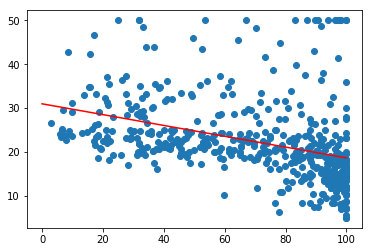

In [11]:
# extract the estimated model parameters
a, b = reg.intercept_, reg.coef_[0]  # fitted model parameters
print(f'y_pred = {b:.2f} * AGE + {a:.2f}')

# plot both fitted and new data
f, ax = plt.subplots(figsize=(6, 4))
ax.plot(X[['AGE']], y, 'o', X_new, y_pred, 'r');

## Models 

### Four estimator types

Based on their learning models the estimators can roughly be categorized as follows:

- Regressors
- Classifiers
- Clusterers
- Transformers

Many models within a category, each with its own assumptions, strengths and weaknesses.

### Commonly used Regressors

- k-NN : `neighbors.KNeighborsRegressor`
- Linear : `linear_model.LinearRegression`
- Lasso : `linear_model.Lasso`
- Ridge : `linear_model.Ridge`
- ElasticNet : `linear_model.ElasticNet`
- Linear SVM : `svm.LinearSVR`
- Kernel SVM : `svm.SVR`
- Random Forest : `ensemble.RandomForestRegressor`

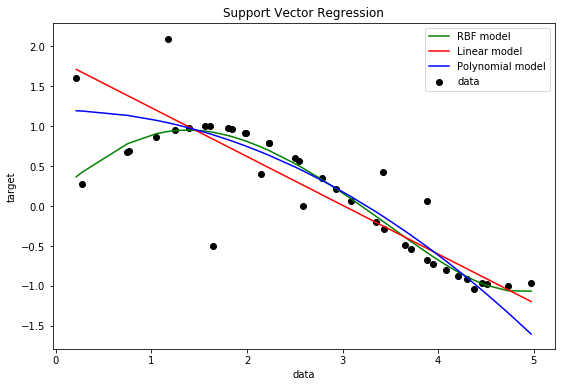

<Figure size 432x288 with 0 Axes>

In [12]:
%run ../lib/plot_svm_regression.py

### Commonly used Classifiers

- k-NN : `neighbors.KNeighborsClassifier`
- Logistic Regression : `linear_model.LogisticRegression`
- Naive Bayes : `naive_bayes.MultinomialNB`
- LDA : `sklearn.lda`
- QDA : `sklearn.qda`
- Linear SVM :`svm.LinearSVC`
- Kernel SVM : `svm.SVC`
- Decision Tree : `tree.DecisionTreeClassifier`
- Random Forest : `ensemble.RandomForestClassifier`

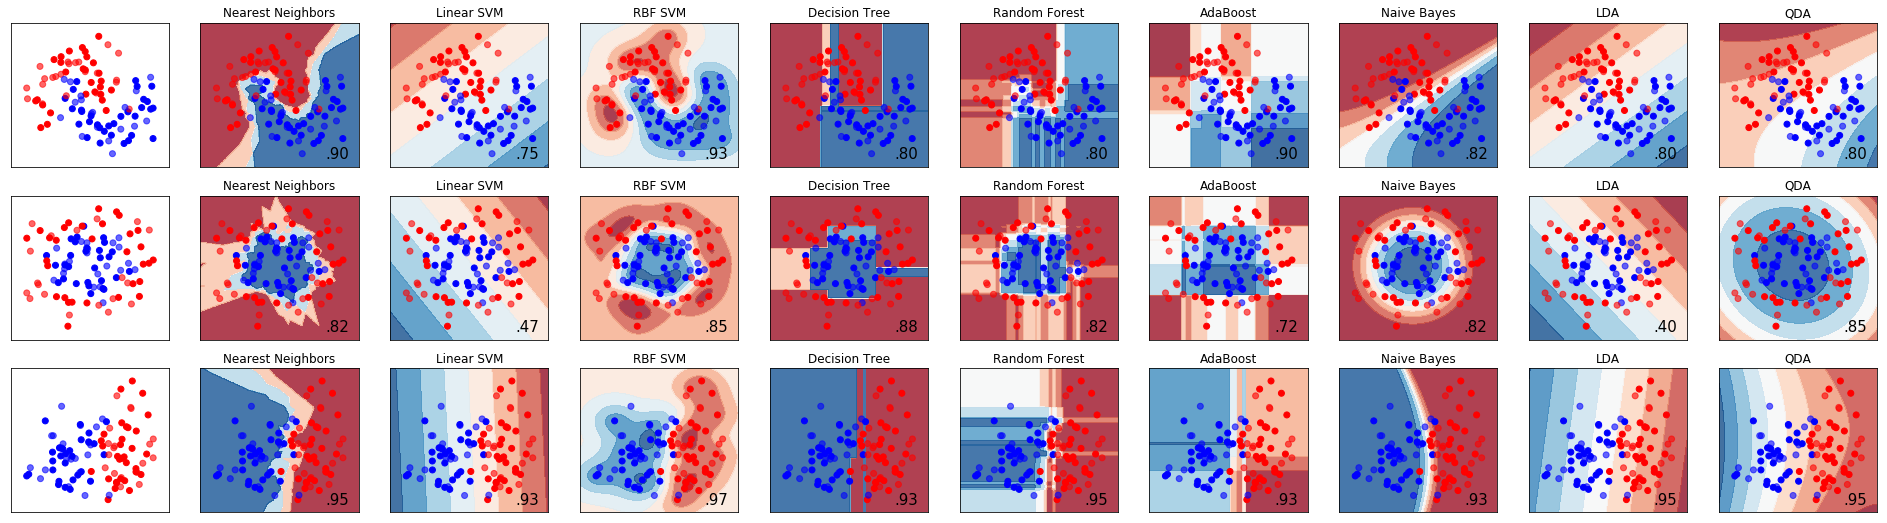

In [13]:
%run ../lib/plot_classifier_comparison.py

### Commonly used Clusterers

- K-Means : `cluster.KMeans`
- Hierarchical : `cluster.AgglomerativeClustering`
- Distribution-based : `mixture.GMM`
- Density-based : `cluster.DBSCAN`

In [1]:
%run ../lib/plot_cluster_comparison.py

ERROR:root:File `'../lib/plot_cluster_comparison.py'` not found.


### Commonly used Transformers

- Imputer : `preprocessing.Imputer`
- Standard Scaler : `preprocessing.StandardScaler`
- Normalizer : `preprocessing.Normalizer`
- One-HOT Encoder : `preprocessing.OneHotEncoder`
- Principal Component Analysis : `decomposition.PCA`
- Singular Value Decomposition : `decomposition.TruncatedSVD`

### PCA vs. LDA

Both transform the data, but
* PCA: tries to explain as much variance as possible (unsupervised)
* LDA: similar but with respect to the target (supervised)

PCA: explained variance ratio (first two components): [ 0.99809123  0.00173592]
LDA: explained variance ratio (first two components): [ 0.68747889  0.31252111]


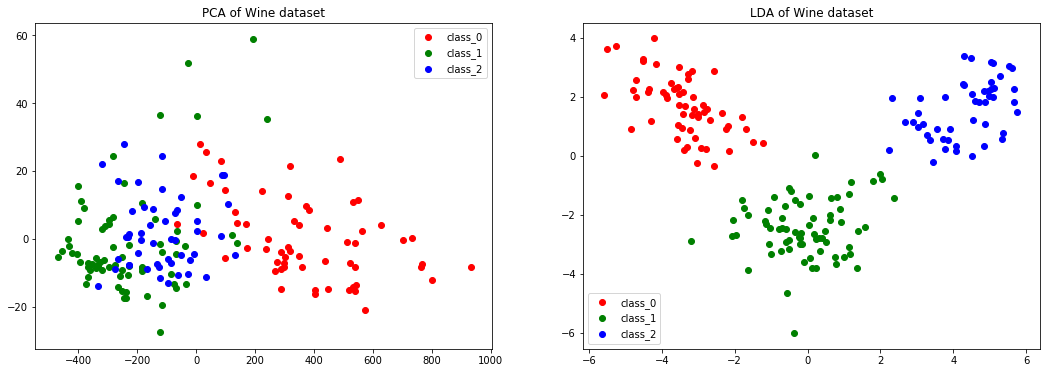

In [15]:
%run ../lib/plot_pca_vs_lda.py

## Estimator API overview

**Initialization**:

- `from sklearn.estimator_module import Estimator`
- `model = Estimator(hyperparam1=1, hyperparam2=2)`

**Input data**:

- `X` : features; 2d `numpy` array or `scipy` sparse matrix of shape (n_samples, n_features)
- `y` : targets, optional; 1d `numpy` array of shape (n_samples)

**General methods**:

- `model.fit(X, y=None)`: fit the model to the data, targets are optional
- `model.predict(X)`: predict model outputs
- `model.score(X)`: score model with 'default' metric

**Classifier-specific methods**:

- `model.decision_function(X)`: predict confidence scores
- `model.predict_proba(X)`: predict class probabilities 

**Clusterer-specific methods**:

- `model.fit_predict(X)`: fit and predict in a single step

**Transformer specific methods**:

- `model.transform(X)`: transform data using fitted model
- `model.fit_transform(X)`: fit and transform in a single step
   
**Attributes**:

- `model.<param>`: hyper parameter set during intialization
- `model.<param>_`: model parameter estimated during fitting

All model methods and attributes can be viewed through `model.`*tab-completion* or `dir(model)`.    

# Review Questions 

1. What is the difference between `.predict()` and `.predict_proba()`? 
2. Could you mention two commonly used transformers? 

# Exercises: [lab 3 - Model fitting](../labs/lab_03_model_fitting.ipynb)